In [1]:
!pip install imblearn
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.


In [2]:
#import neccessary libraries
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from tensorflow.keras.utils import get_file
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from collections import Counter
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from imblearn.combine import SMOTETomek
import os
from sklearn import metrics
from scipy.stats import zscore
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

2022-11-16 20:35:19.303107: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 20:35:19.689299: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#KDD99

In [3]:
path = "kddcup.data.corrected"
kdd_df = pd.read_csv(path, header=None)

In [4]:
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       int64  
 1   1       object 
 2   2       object 
 3   3       object 
 4   4       int64  
 5   5       int64  
 6   6       int64  
 7   7       int64  
 8   8       int64  
 9   9       int64  
 10  10      int64  
 11  11      int64  
 12  12      int64  
 13  13      int64  
 14  14      int64  
 15  15      int64  
 16  16      int64  
 17  17      int64  
 18  18      int64  
 19  19      int64  
 20  20      int64  
 21  21      int64  
 22  22      int64  
 23  23      int64  
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      int64  
 32  32      int64  
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64
 40  

In [5]:
#original data columns are unlabeled, we are labeling them
kdd_df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

In [6]:
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [7]:
#print some insights about the KDD99 dataset
print("Read {} rows.".format(len(kdd_df)))
print('='*40)
print('The number of data points are:', kdd_df.shape[0])
print('='*40)
print('The number of features are:', kdd_df.shape[1])
print('='*40)
output = kdd_df['outcome'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 4898431 rows.
The number of data points are: 4898431
The number of features are: 42
The different type of output labels are: {'portsweep.', 'teardrop.', 'back.', 'spy.', 'ftp_write.', 'warezclient.', 'perl.', 'phf.', 'neptune.', 'multihop.', 'guess_passwd.', 'land.', 'pod.', 'satan.', 'smurf.', 'loadmodule.', 'rootkit.', 'ipsweep.', 'buffer_overflow.', 'warezmaster.', 'imap.', 'nmap.', 'normal.'}
The number of different output labels are: 23


##Data Cleaning

In [8]:
# Checking for NULL values
print('Null values in dataset are',len(kdd_df[kdd_df.isnull().any(1)]))
print('='*40)

# Checkng for DUPLICATE values
kdd_df.drop_duplicates(keep='first', inplace = True)

# For now, just drop NA's (rows with missing values)
kdd_df.dropna(inplace=True,axis=1) 
print("Read {} rows.".format(len(kdd_df)))

Null values in dataset are 0
Read 1074992 rows.


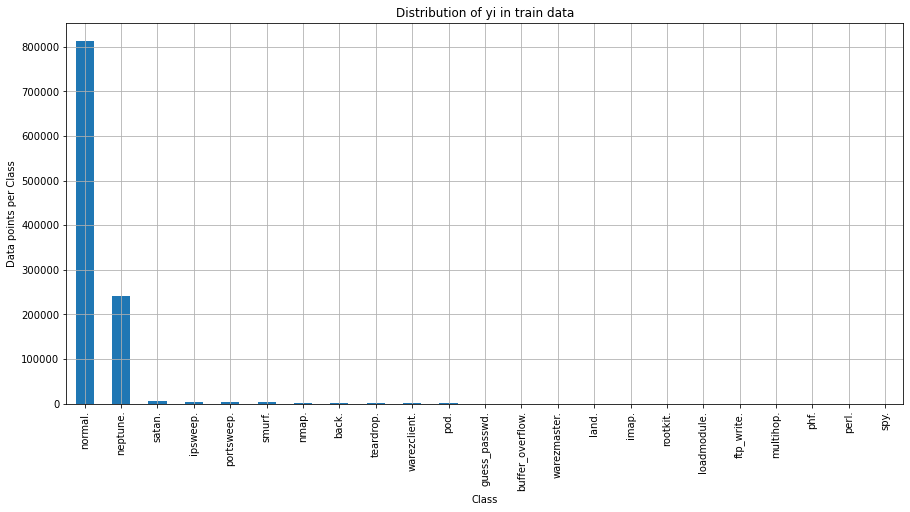

In [9]:
plt.figure(figsize=(15,7))
class_distribution = kdd_df['outcome'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [10]:
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/kdd_df.shape[0]*100), 3), '%)')

Number of data points in class normal. : 812814 ( 75.611 %)
Number of data points in class neptune. : 242149 ( 22.526 %)
Number of data points in class satan. : 5019 ( 0.467 %)
Number of data points in class ipsweep. : 3723 ( 0.346 %)
Number of data points in class portsweep. : 3564 ( 0.332 %)
Number of data points in class smurf. : 3007 ( 0.28 %)
Number of data points in class nmap. : 1554 ( 0.145 %)
Number of data points in class back. : 968 ( 0.09 %)
Number of data points in class teardrop. : 918 ( 0.085 %)
Number of data points in class warezclient. : 893 ( 0.083 %)
Number of data points in class pod. : 206 ( 0.019 %)
Number of data points in class guess_passwd. : 53 ( 0.005 %)
Number of data points in class buffer_overflow. : 30 ( 0.003 %)
Number of data points in class warezmaster. : 20 ( 0.002 %)
Number of data points in class land. : 19 ( 0.002 %)
Number of data points in class imap. : 12 ( 0.001 %)
Number of data points in class rootkit. : 10 ( 0.001 %)
Number of data points i

#Some preprocessing

In [11]:
kdd_df['outcome'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

##Apply onehot encoding to the categorical columns

In [12]:
ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [13]:
analyze(kdd_df)


1074992 rows
** duration:9883 (0%)
** protocol_type:[tcp:91.03%,udp:7.86%,icmp:1.11%]
** service:[http:54.0%,private:18.49%,smtp:8.98%,domain_u:4.35%,ftp_data:3.76%,other:2.88%,finger:0.64%,eco_i:0.49%,ftp:0.48%,telnet:0.39%,ecr_i:0.35%,auth:0.31%,urp_i:0.25%,ntp_u:0.21%,pop_3:0.18%,time:0.11%,domain:0.1%,Z39_50:0.1%,gopher:0.1%,mtp:0.1%,whois:0.1%,remote_job:0.1%,uucp_path:0.1%,ssh:0.1%,ctf:0.1%,discard:0.1%,link:0.1%,name:0.1%,daytime:0.1%,iso_tsap:0.1%,netstat:0.1%,netbios_ns:0.1%,pop_2:0.1%,csnet_ns:0.1%,imap4:0.1%,rje:0.1%,echo:0.1%,klogin:0.1%,netbios_dgm:0.09%,sql_net:0.09%,nnsp:0.09%,supdup:0.09%,nntp:0.09%,netbios_ssn:0.09%,shell:0.09%,vmnet:0.09%,hostnames:0.09%,systat:0.09%,bgp:0.09%,ldap:0.09%,kshell:0.09%,sunrpc:0.09%,printer:0.09%,courier:0.09%,login:0.09%,http_443:0.09%,uucp:0.09%,efs:0.09%,exec:0.09%,IRC:0.05%,urh_i:0.01%,X11:0.01%,tim_i:0.0%,red_i:0.0%,pm_dump:0.0%,tftp_u:0.0%,harvest:0.0%,aol:0.0%,http_8001:0.0%,http_2784:0.0%]
** flag:[SF:73.19%,S0:18.94%,REJ:7.02%,

In [14]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [15]:
# Now encode the feature vector

encode_numeric_zscore(kdd_df, 'duration')
encode_text_dummy(kdd_df, 'protocol_type')
encode_text_dummy(kdd_df, 'service')
encode_text_dummy(kdd_df, 'flag')
encode_numeric_zscore(kdd_df, 'src_bytes')
encode_numeric_zscore(kdd_df, 'dst_bytes')
encode_text_dummy(kdd_df, 'land')
encode_numeric_zscore(kdd_df, 'wrong_fragment')
encode_numeric_zscore(kdd_df, 'urgent')
encode_numeric_zscore(kdd_df, 'hot')
encode_numeric_zscore(kdd_df, 'num_failed_logins')
encode_text_dummy(kdd_df, 'logged_in')
encode_numeric_zscore(kdd_df, 'num_compromised')
encode_numeric_zscore(kdd_df, 'root_shell')
encode_numeric_zscore(kdd_df, 'su_attempted')
encode_numeric_zscore(kdd_df, 'num_root')
encode_numeric_zscore(kdd_df, 'num_file_creations')
encode_numeric_zscore(kdd_df, 'num_shells')
encode_numeric_zscore(kdd_df, 'num_access_files')
encode_numeric_zscore(kdd_df, 'num_outbound_cmds')
encode_text_dummy(kdd_df, 'is_host_login')
encode_text_dummy(kdd_df, 'is_guest_login')
encode_numeric_zscore(kdd_df, 'count')
encode_numeric_zscore(kdd_df, 'srv_count')
encode_numeric_zscore(kdd_df, 'serror_rate')
encode_numeric_zscore(kdd_df, 'srv_serror_rate')
encode_numeric_zscore(kdd_df, 'rerror_rate')
encode_numeric_zscore(kdd_df, 'srv_rerror_rate')
encode_numeric_zscore(kdd_df, 'same_srv_rate')
encode_numeric_zscore(kdd_df, 'diff_srv_rate')
encode_numeric_zscore(kdd_df, 'srv_diff_host_rate')
encode_numeric_zscore(kdd_df, 'dst_host_count')
encode_numeric_zscore(kdd_df, 'dst_host_srv_count')
encode_numeric_zscore(kdd_df, 'dst_host_same_srv_rate')
encode_numeric_zscore(kdd_df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(kdd_df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(kdd_df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(kdd_df, 'dst_host_serror_rate')
encode_numeric_zscore(kdd_df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(kdd_df, 'dst_host_rerror_rate')
encode_numeric_zscore(kdd_df, 'dst_host_srv_rerror_rate')

# display 5 rows

kdd_df.dropna(inplace=True,axis=1)
kdd_df[0:5]
# This is the numeric feature vectorF

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_host_login-0,is_host_login-1,is_guest_login-0,is_guest_login-1
0,-0.102066,-0.002798,0.029198,-0.030962,-0.002356,-0.054418,-0.009373,-0.004338,-0.01739,-0.009705,...,1,0,1,0,0,1,1,0,1,0
1,-0.102066,-0.002824,-0.000251,-0.030962,-0.002356,-0.054418,-0.009373,-0.004338,-0.01739,-0.009705,...,1,0,1,0,0,1,1,0,1,0
2,-0.102066,-0.002787,-0.002648,-0.030962,-0.002356,-0.054418,-0.009373,-0.004338,-0.01739,-0.009705,...,1,0,1,0,0,1,1,0,1,0
3,-0.102066,-0.002789,-0.002064,-0.030962,-0.002356,-0.054418,-0.009373,-0.004338,-0.01739,-0.009705,...,1,0,1,0,0,1,1,0,1,0
4,-0.102066,-0.002786,-0.003187,-0.030962,-0.002356,-0.054418,-0.009373,-0.004338,-0.01739,-0.009705,...,1,0,1,0,0,1,1,0,1,0


#SMOTE

In [16]:
x = kdd_df.drop(['outcome'], axis=1)
y = kdd_df['outcome']

In [17]:
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
sm = SMOTE(sampling_strategy= 'not majority',k_neighbors= 1)
X_sm, y_sm = sm.fit_resample(x, y)
counter = Counter(y_sm)
print('After',counter)

Before Counter({'normal.': 812814, 'neptune.': 242149, 'satan.': 5019, 'ipsweep.': 3723, 'portsweep.': 3564, 'smurf.': 3007, 'nmap.': 1554, 'back.': 968, 'teardrop.': 918, 'warezclient.': 893, 'pod.': 206, 'guess_passwd.': 53, 'buffer_overflow.': 30, 'warezmaster.': 20, 'land.': 19, 'imap.': 12, 'rootkit.': 10, 'loadmodule.': 9, 'ftp_write.': 8, 'multihop.': 7, 'phf.': 4, 'perl.': 3, 'spy.': 2})
After Counter({'normal.': 812814, 'buffer_overflow.': 812814, 'loadmodule.': 812814, 'perl.': 812814, 'neptune.': 812814, 'smurf.': 812814, 'guess_passwd.': 812814, 'pod.': 812814, 'teardrop.': 812814, 'portsweep.': 812814, 'ipsweep.': 812814, 'land.': 812814, 'ftp_write.': 812814, 'back.': 812814, 'imap.': 812814, 'satan.': 812814, 'phf.': 812814, 'nmap.': 812814, 'multihop.': 812814, 'warezmaster.': 812814, 'warezclient.': 812814, 'spy.': 812814, 'rootkit.': 812814})


##RF + similarity optimization

In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dtree = RandomForestClassifier()
pipe = Pipeline(steps=[("std_slc", std_slc), ("pca", pca), ("dtree", dtree)])

n_components = list(range(1,X_sm.shape[1]+1,1))
criterion = ["friedman_mse", "mse"]
max_depth = [4,6,8,10]
parameters = dict(pca__n_components=n_components, dtree__criterion=criterion, dtree__max_depth=max_depth)
          
clf = GridSearchCV(pipe, parameters)
clf.fit(X_sm, y_sm)

print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(); print(clf.best_estimator_.get_params()["dtreeReg"])

CV_Result = cross_val_score(clf, X_sm, y_sm, cv=3, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

#split the dataset

In [18]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.7, random_state=100)

X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm, y_sm, train_size=0.7, random_state=100)

#Train models on the unnormalized dataset

In [19]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)
print(y_pred_knn)

['normal.' 'normal.' 'normal.' ... 'normal.' 'neptune.' 'normal.']


/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


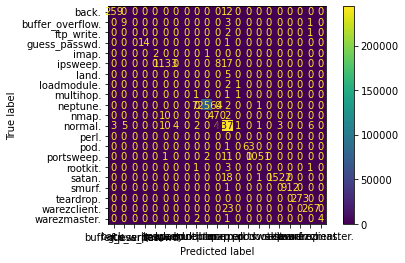

In [20]:
#confusion_matrix(y_test, y_pred_knn)
from sklearn.metrics import plot_confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_pred_knn)
plot_confusion_matrix(neigh, X_test, y_test)
plt.show()

In [21]:
print(classification_report(y_test, y_pred_knn))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

                  precision    recall  f1-score   support

           back.       0.99      0.96      0.97       271
buffer_overflow.       0.64      0.69      0.67        13
      ftp_write.       0.00      0.00      0.00         3
   guess_passwd.       1.00      0.93      0.97        15
           imap.       1.00      0.67      0.80         3
        ipsweep.       0.98      0.98      0.98      1158
           land.       0.00      0.00      0.00         5
     loadmodule.       0.00      0.00      0.00         3
       multihop.       0.17      0.33      0.22         3
        neptune.       1.00      1.00      1.00     72567
           nmap.       0.98      0.98      0.98       482
         normal.       1.00      1.00      1.00    243817
           perl.       0.00      0.00      0.00         0
            pod.       1.00      0.98      0.99        64
      portsweep.       1.00      0.99      0.99      1065
        rootkit.       0.00      0.00      0.00         5
          sat

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

In [ ]:
y_pred_svm = svm_clf.predict(X_test)
y_pred_svm

In [ ]:
cnf_matrix=confusion_matrix(y_test,y_pred_svm)
plot_confusion_matrix(svm_clf, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm))

In [ ]:
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
#confusion_matrix(y_test, y_pred_knn)
from sklearn.metrics import plot_confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_pred_rf)
plot_confusion_matrix(rf_clf, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

#Train models on normalized dataset with SMOTE

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_sm, y_train_sm)
y_pred_knn = neigh.predict(X_test_sm)
print(y_pred_knn)

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_knn)
plot_confusion_matrix(neigh, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_knn))

In [ ]:
rf_clf = RandomForestClassifier(max_depth=3, random_state=0)
rf_clf.fit(X_train_sm, y_train_sm)

In [ ]:
y_pred_rf = rf_clf.predict(X_test_sm)

In [ ]:
print(classification_report(y_test_sm, y_pred_rf))

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_rf)
plot_confusion_matrix(rf_clf, X_test_sm, y_test_sm)
plt.show()

#SMOTE + ENN

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
X_temp = pd.concat([X_train_sm, X_test_sm], axis=0)
y_temp = pd.concat([y_train_sm, y_test_sm], axis=0)
X_train_temp,X_test_temp,y_train_temp,y_test_temp=train_test_split(X_temp, y_temp, train_size=0.98, random_state=100)

smm = SMOTE(sampling_strategy= 'not majority',k_neighbors= 1)
smenn = SMOTEENN(sampling_strategy= 'not majority', smote = smm)
X_smenn, y_smenn = smenn.fit_resample(X_train_temp, y_train_temp)
counter = Counter(y_smenn)
print('After',counter)

X_x = pd.concat([X_smenn, X_test_temp], axis=0)
y_y = pd.concat([y_smenn, y_test_temp], axis=0)
X_train_smenn,X_test_smenn,y_train_smenn,y_test_smenn=train_test_split(X_x, y_y, train_size=0.7, random_state=100)

#models after normalization using: SMOTE + ENN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_smenn, y_train_smenn)
y_pred_knn = neigh.predict(X_test_sm)
print(y_pred_knn)

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_knn)
plot_confusion_matrix(neigh, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_knn))

In [ ]:
rf_clf = RandomForestClassifier(max_depth=3, random_state=0)
rf_clf.fit(X_train_smenn, y_train_smenn)

In [ ]:
y_pred_rf = rf_clf.predict(X_test_sm)

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_rf)
plot_confusion_matrix(rf_clf, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_rf))

#SMOTE+Tomek links

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
X_temp = pd.concat([X_train_sm, X_test_sm], axis=0)
y_temp = pd.concat([y_train_sm, y_test_sm], axis=0)
X_train_temp,X_test_temp,y_train_temp,y_test_temp=train_test_split(X_temp, y_temp, train_size=0.98, random_state=100)

smtom = SMOTETomek(random_state=139)
X_smtom, y_smtom = smtom.fit_resample(X_train_temp, y_train_temp)

counter = Counter(y_smtom)
print('After',counter)

X_x = pd.concat([X_smtom, X_test_temp], axis=0)
y_y = pd.concat([y_smtom, y_test_temp], axis=0)
X_train_smtom,X_test_smtom,y_train_smtom,y_test_smtom=train_test_split(X_x, y_y, train_size=0.7, random_state=100)

#models after normalization using: SMOTE + Tomek links

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_smtom, y_train_smtom)
y_pred_knn = neigh.predict(X_test_sm)
print(y_pred_knn)

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_knn)
plot_confusion_matrix(neigh, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_knn))

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(X_train_smtom, y_train_smtom)

In [ ]:
y_pred_svm = svm_clf.predict(X_test_sm)
y_pred_svm

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm, y_pred_svm)
plot_confusion_matrix(svm_clf, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_svm))

In [ ]:
rf_clf = RandomForestClassifier(max_depth=3, random_state=0)
rf_clf.fit(X_train_smtom, y_train_smtom)

In [ ]:
y_pred_rf = rf_clf.predict(X_test_sm)

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_rf)
plot_confusion_matrix(rf_clf, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_rf))